# New York City Taxi Trip Data Report

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [12]:
# import data and load data set in a variable
nyc_taxi = pd.read_parquet('data/nyc_taxi.parquet')

In [14]:
# Dimensionality of the Dataframe
nyc_taxi.shape

(1458644, 11)

In [16]:
# Checking the first n rows of the object. By default n=5
nyc_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## Data Fields
**id**: a unique identifier for each trip

**vendor_id**: a code indicating the provider associated with the trip record

**pickup_datetime**: date and time when the meter was engaged

**dropoff_datetime**: date and time when the meter was disengaged

**passenger_count**: the number of passengers in the vehicle (driver entered value)

**pickup_longitude**: the longitude where the meter was engaged

**pickup_latitude**:  the latitude where the meter was engaged

**dropoff_longitude**: the longitude where the meter was disengaged

**dropoff_latitude**:  the latitude where the meter was disengaged

**store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

**trip_duration**: duration of the trip in seconds

In [19]:
# Descriptive statistics
nyc_taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [21]:
# Skewness and Kurtosis for numerical columns
for column in nyc_taxi.select_dtypes(include='number'):
    print(f'{column} Skewness: {skew(nyc_taxi[column].dropna())}')
    print(f'{column} Kurtosis: {kurtosis(nyc_taxi[column].dropna())}')

vendor_id Skewness: -0.14014387221414595
vendor_id Kurtosis: -1.9803596950808267
passenger_count Skewness: 2.1280914221523757
passenger_count Kurtosis: 3.4317549670076106
pickup_longitude Skewness: -418.11995457989866
pickup_longitude Kurtosis: 288155.532621626
pickup_latitude Skewness: 5.489121439755555
pickup_latitude Kurtosis: 12950.197146005448
dropoff_longitude Skewness: -425.33128646102824
dropoff_longitude Kurtosis: 292525.019036173
dropoff_latitude Skewness: -20.671166184438896
dropoff_latitude Kurtosis: 4259.527948259523
trip_duration Skewness: 343.163590698184
trip_duration Kurtosis: 192130.8587073146


In [22]:
# Checking all column types in the dataframe
nyc_taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [25]:
# Correlation matrics between numerical datas in the pandas dataframe

# selecting only numerical values since correlation method can only be applied on numeric datatypes
numeric_nyc_taxi_df = nyc_taxi.select_dtypes(include='number')
numeric_nyc_taxi_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000


In [26]:
# Showing the heatmap produced from the correlation matrix drawn above

def create_heatmap(df, columns):
    """
    Creates a heatmap to show the correlation between selected numerical features.
    
    Parameters:
    df : The DataFrame containing the dataset.
    columns : The list of column names to include in the correlation matrix.
    """
    plt.figure(figsize=(10, 8))
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    
    # Add title
    plt.title('Correlation Matrix of NYC Taxi Trip Data', fontsize=14)
    plt.show()

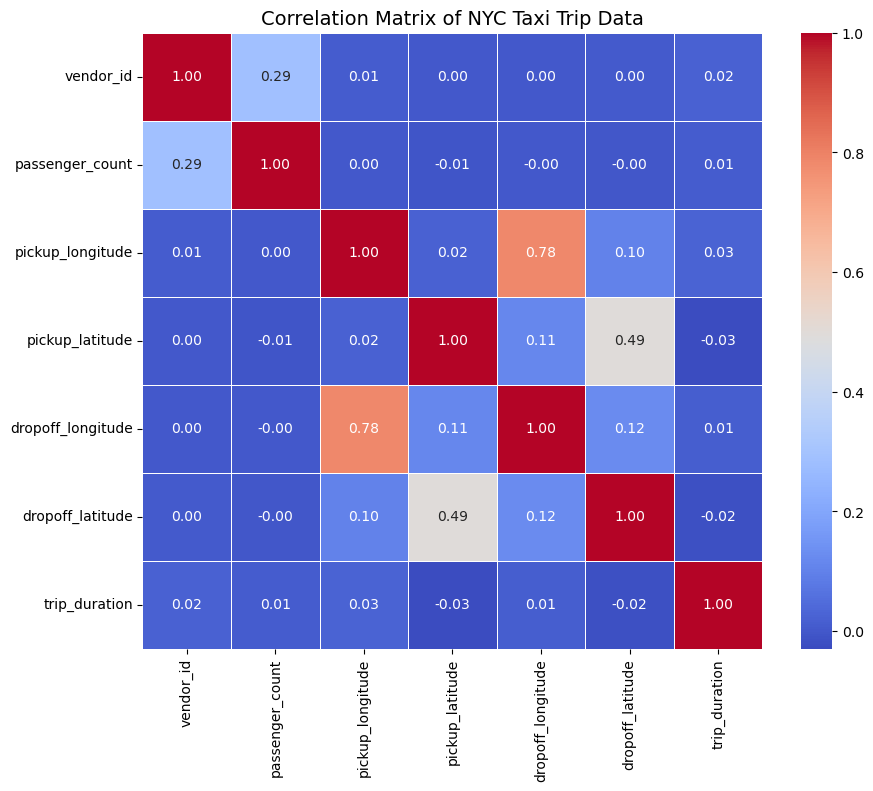

In [29]:
numeric_nyc_taxi_df = nyc_taxi.select_dtypes(include='number')

create_heatmap(numeric_nyc_taxi_df, numeric_nyc_taxi_df.columns)

In [31]:
# Count number of missing values
nyc_taxi.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [33]:
def create_relational_plot(df, x_column, y_column):
    """
    This function creates a scatter plot showing the relationship between two variables.
    
    Parameters:
    df : The DataFrame containing the dataset.
    x_column : The name of the column for the x-axis.
    y_column : The name of the column for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    
    # Apply log transformation if needed
    y_data = np.log1p(df[y_column])
    
    plt.scatter(df[x_column], y_data, alpha=0.5, color='blue')
    plt.xlabel(x_column.capitalize(), fontsize=14)
    plt.ylabel(f'Log {y_column.capitalize()}', fontsize=14)
    plt.title(f'Relationship between {x_column.capitalize()} and {y_column.capitalize()}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

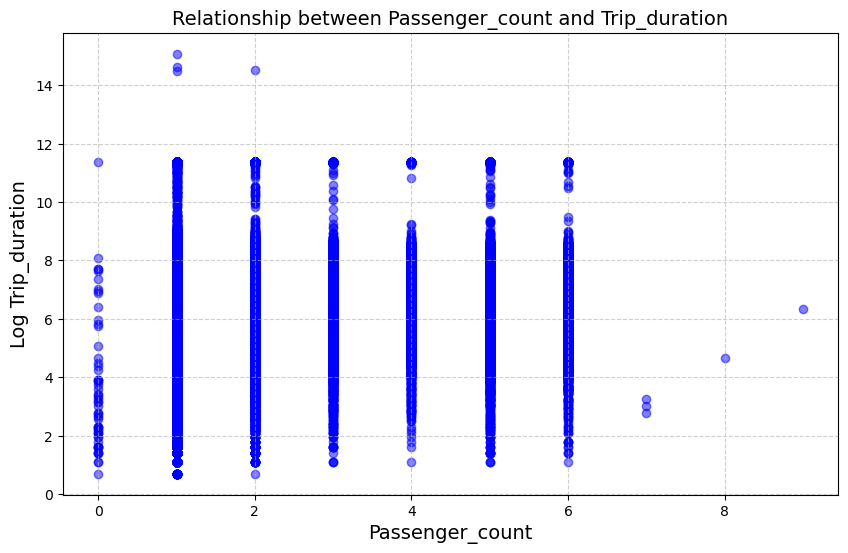

In [35]:
# Create the relational plot
create_relational_plot(nyc_taxi, 'passenger_count', 'trip_duration')

In [36]:
def create_categorical_plot(df, x_column, y_column, aggregation='mean'):
    """
    Creates a bar plot to visualize aggregated numerical data across categories.
    
    Parameters:
    df : The DataFrame containing the dataset.
    x_column : The categorical variable to group data by.
    y_column : The numerical variable to analyze.
    aggregation : The type of aggregation to apply
    """
    plt.figure(figsize=(12, 6))
    
    # Convert trip duration to minutes
    df['trip_duration_minutes'] = df[y_column] / 60
    
    # Aggregate data
    if aggregation == 'mean':
        aggregated_data = df.groupby(x_column)['trip_duration_minutes'].mean()
        title = f'Average Trip Duration (Minutes) by {x_column.capitalize()}'
    elif aggregation == 'median':
        aggregated_data = df.groupby(x_column)['trip_duration_minutes'].median()
        title = f'Median Trip Duration (Minutes) by {x_column.capitalize()}'
    elif aggregation == 'sum':
        aggregated_data = df.groupby(x_column)['trip_duration_minutes'].sum()
        title = f'Total Trip Duration (Minutes) by {x_column.capitalize()}'
    else:
        raise ValueError("Unsupported aggregation type. Use 'mean', 'median', or 'sum'.")
    
    # Create bar plot
    aggregated_data.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Customize labels and title
    plt.xlabel(x_column.capitalize(), fontsize=14)
    plt.ylabel('Trip Duration (Minutes)', fontsize=14)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

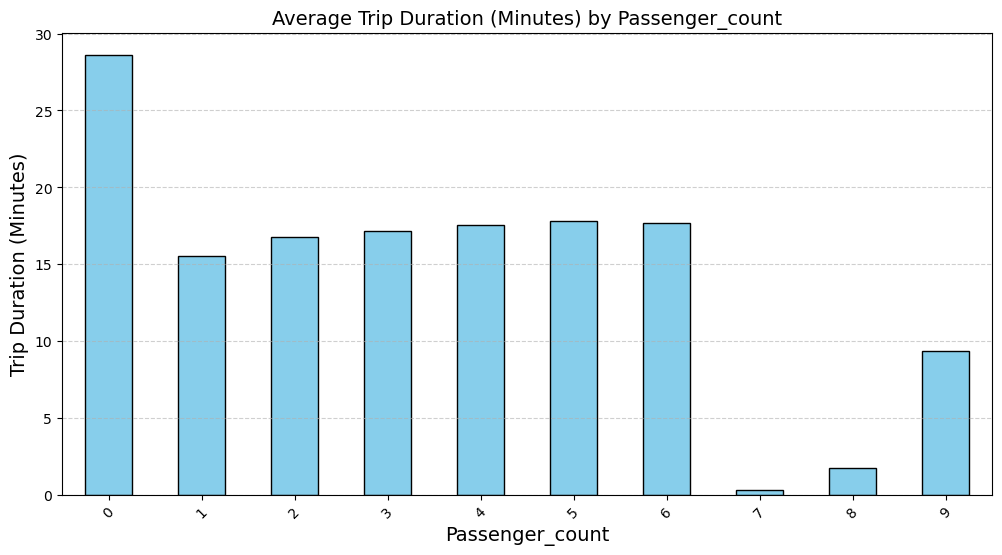

In [37]:
create_categorical_plot(nyc_taxi, x_column='passenger_count', y_column='trip_duration', aggregation='mean')

In [41]:
def create_statistical_plot(df, x_column, y_column):
    """
    Creates a box plot to visualize the distribution of a numerical variable grouped by a categorical variable.
    
    Parameters:
    df : The DataFrame containing the dataset.
    x_column : The name of the column for the x-axis (categorical variable).
    y_column : The name of the column for the y-axis (numerical variable).
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=x_column, y=y_column, showfliers=False, palette="Set2")
    
    # Adding labels and title
    plt.xlabel(x_column.capitalize(), fontsize=14)
    plt.ylabel(f'{y_column.capitalize()} (in seconds)', fontsize=14)
    plt.title(f'{y_column.capitalize()} Distribution by {x_column.capitalize()}', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_14412\2893708539.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_column, y=y_column, showfliers=False, palette="Set2")


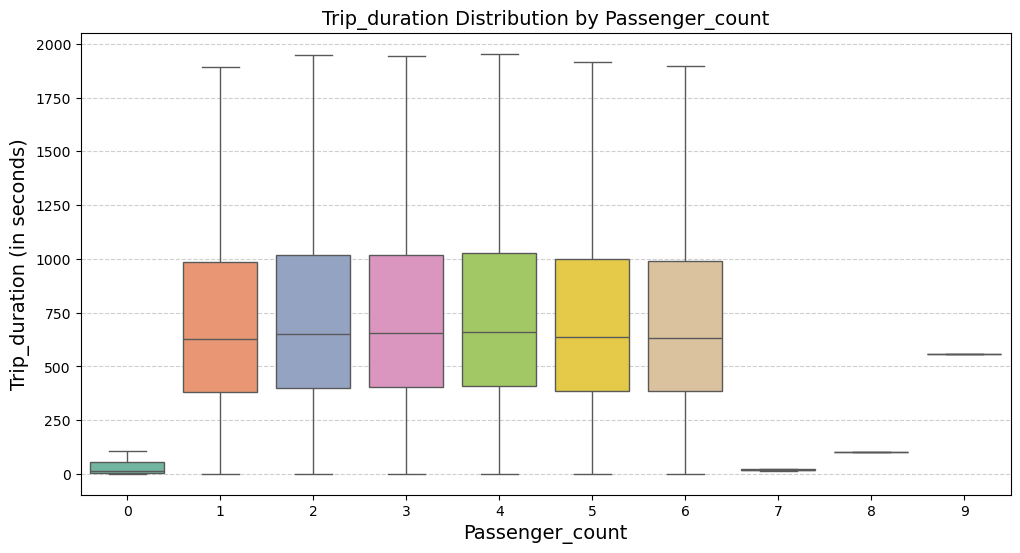

In [43]:
# Filter extreme trip_duration values for better visualization
q95 = nyc_taxi['trip_duration'].quantile(0.95)
filtered_df = nyc_taxi[nyc_taxi['trip_duration'] <= q95]

# Create the statistical plot
create_statistical_plot(filtered_df, 'passenger_count', 'trip_duration')